In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
df.isnull().sum() # hence location contains most of the null values

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [7]:
df.shape

(41156, 6)

In [10]:
# TO Know the unique values  of  features

df.nunique()

UserName         41156
ScreenName       41156
Location         12219
TweetAt             30
OriginalTweet    41156
Sentiment            5
dtype: int64

In [12]:
df['Sentiment'].unique() # considered as categorical feature

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [22]:
# as we have 12219 of unique location and total of 41156 are used in raw data out of which 8590 did not mention the location values.
# as location is an import feature and its null values is less than 50% of overall dataset hence removing the location with null values.
# therefore making  a dataframe  with location_without null values. 


# Finding the percentage of  missing values in location
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage # 20.8%

UserName          0.000000
ScreenName        0.000000
Location         20.871805
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

In [17]:
df.describe()

,UserName,ScreenName
count,41156.000000,41156.000000
mean,24377.490961,69329.490961
std,11880.873691,11880.873691
min,3799.000000,48751.000000
25%,14088.750000,59040.750000
50%,24377.500000,69329.500000
75%,34666.250000,79618.250000
max,44955.000000,89907.000000


In [45]:
df_withoutnull = df.dropna(subset=['Location'])
df_withoutnull=df_withoutnull.drop('OriginalTweet',axis=1)
df_withoutnull.isnull().sum()

UserName      0
ScreenName    0
Location      0
TweetAt       0
Sentiment     0
dtype: int64

In [69]:
replace={'1/4/2020':'01-04-2020',
       '2/4/2020':'02-04-2020',
        '3/4/2020':'03-04-2020', '4/4/2020':'04-04-2020', '5/4/2020':'05-04-2020', '6/4/2020':'06-04-2020',
       '7/4/2020':'07-04-2020', '8/4/2020':'08-04-2020', '9/4/2020':'09-04-2020', '10/4/2020':'10-04-2020', '11/4/2020':'11-04-2020',
       '12/4/2020':'12-04-2020'}
df_withoutnull['TweetAt'] = df_withoutnull['TweetAt'].replace(replace)

In [46]:
counts = df_withoutnull['Sentiment'].value_counts()
counts # count according to the categories  , hence most of the  tweets are positive

Sentiment
Positive              9110
Negative              7762
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: count, dtype: int64

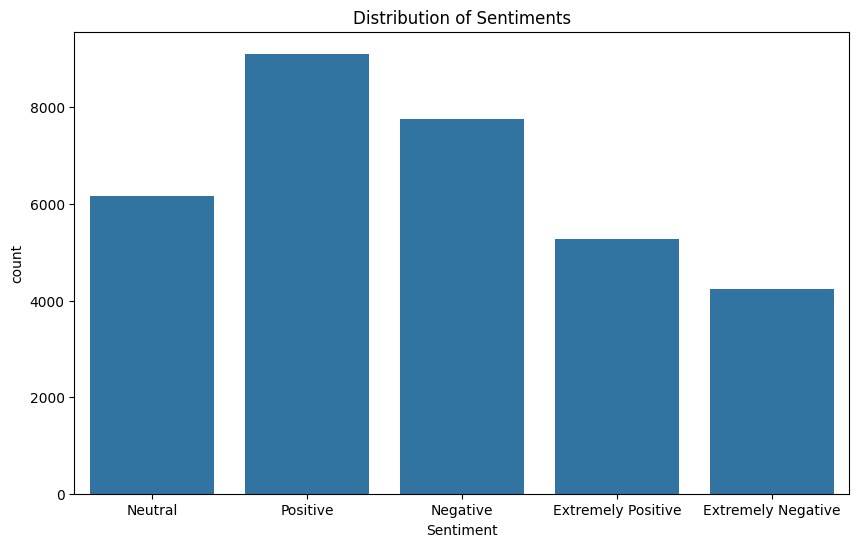

In [47]:
import matplotlib.pyplot as plt

# Ploting the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(data=df_withoutnull, x='Sentiment')
plt.title('Distribution of Sentiments')
plt.show()

In [48]:
df_withoutnull

,UserName,ScreenName,Location,TweetAt,Sentiment
0,3799,48751,London,16-03-2020,Neutral
1,3800,48752,UK,16-03-2020,Positive
2,3801,48753,Vagabonds,16-03-2020,Positive
5,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Positive
...,...,...,...,...,...
41146,44946,89898,"Brooklyn, NY",14-04-2020,Negative
41148,44948,89900,"Toronto, Ontario",14-04-2020,Negative
41149,44949,89901,OHIO,14-04-2020,Positive
41151,44951,89903,"Wellington City, New Zealand",14-04-2020,Neutral


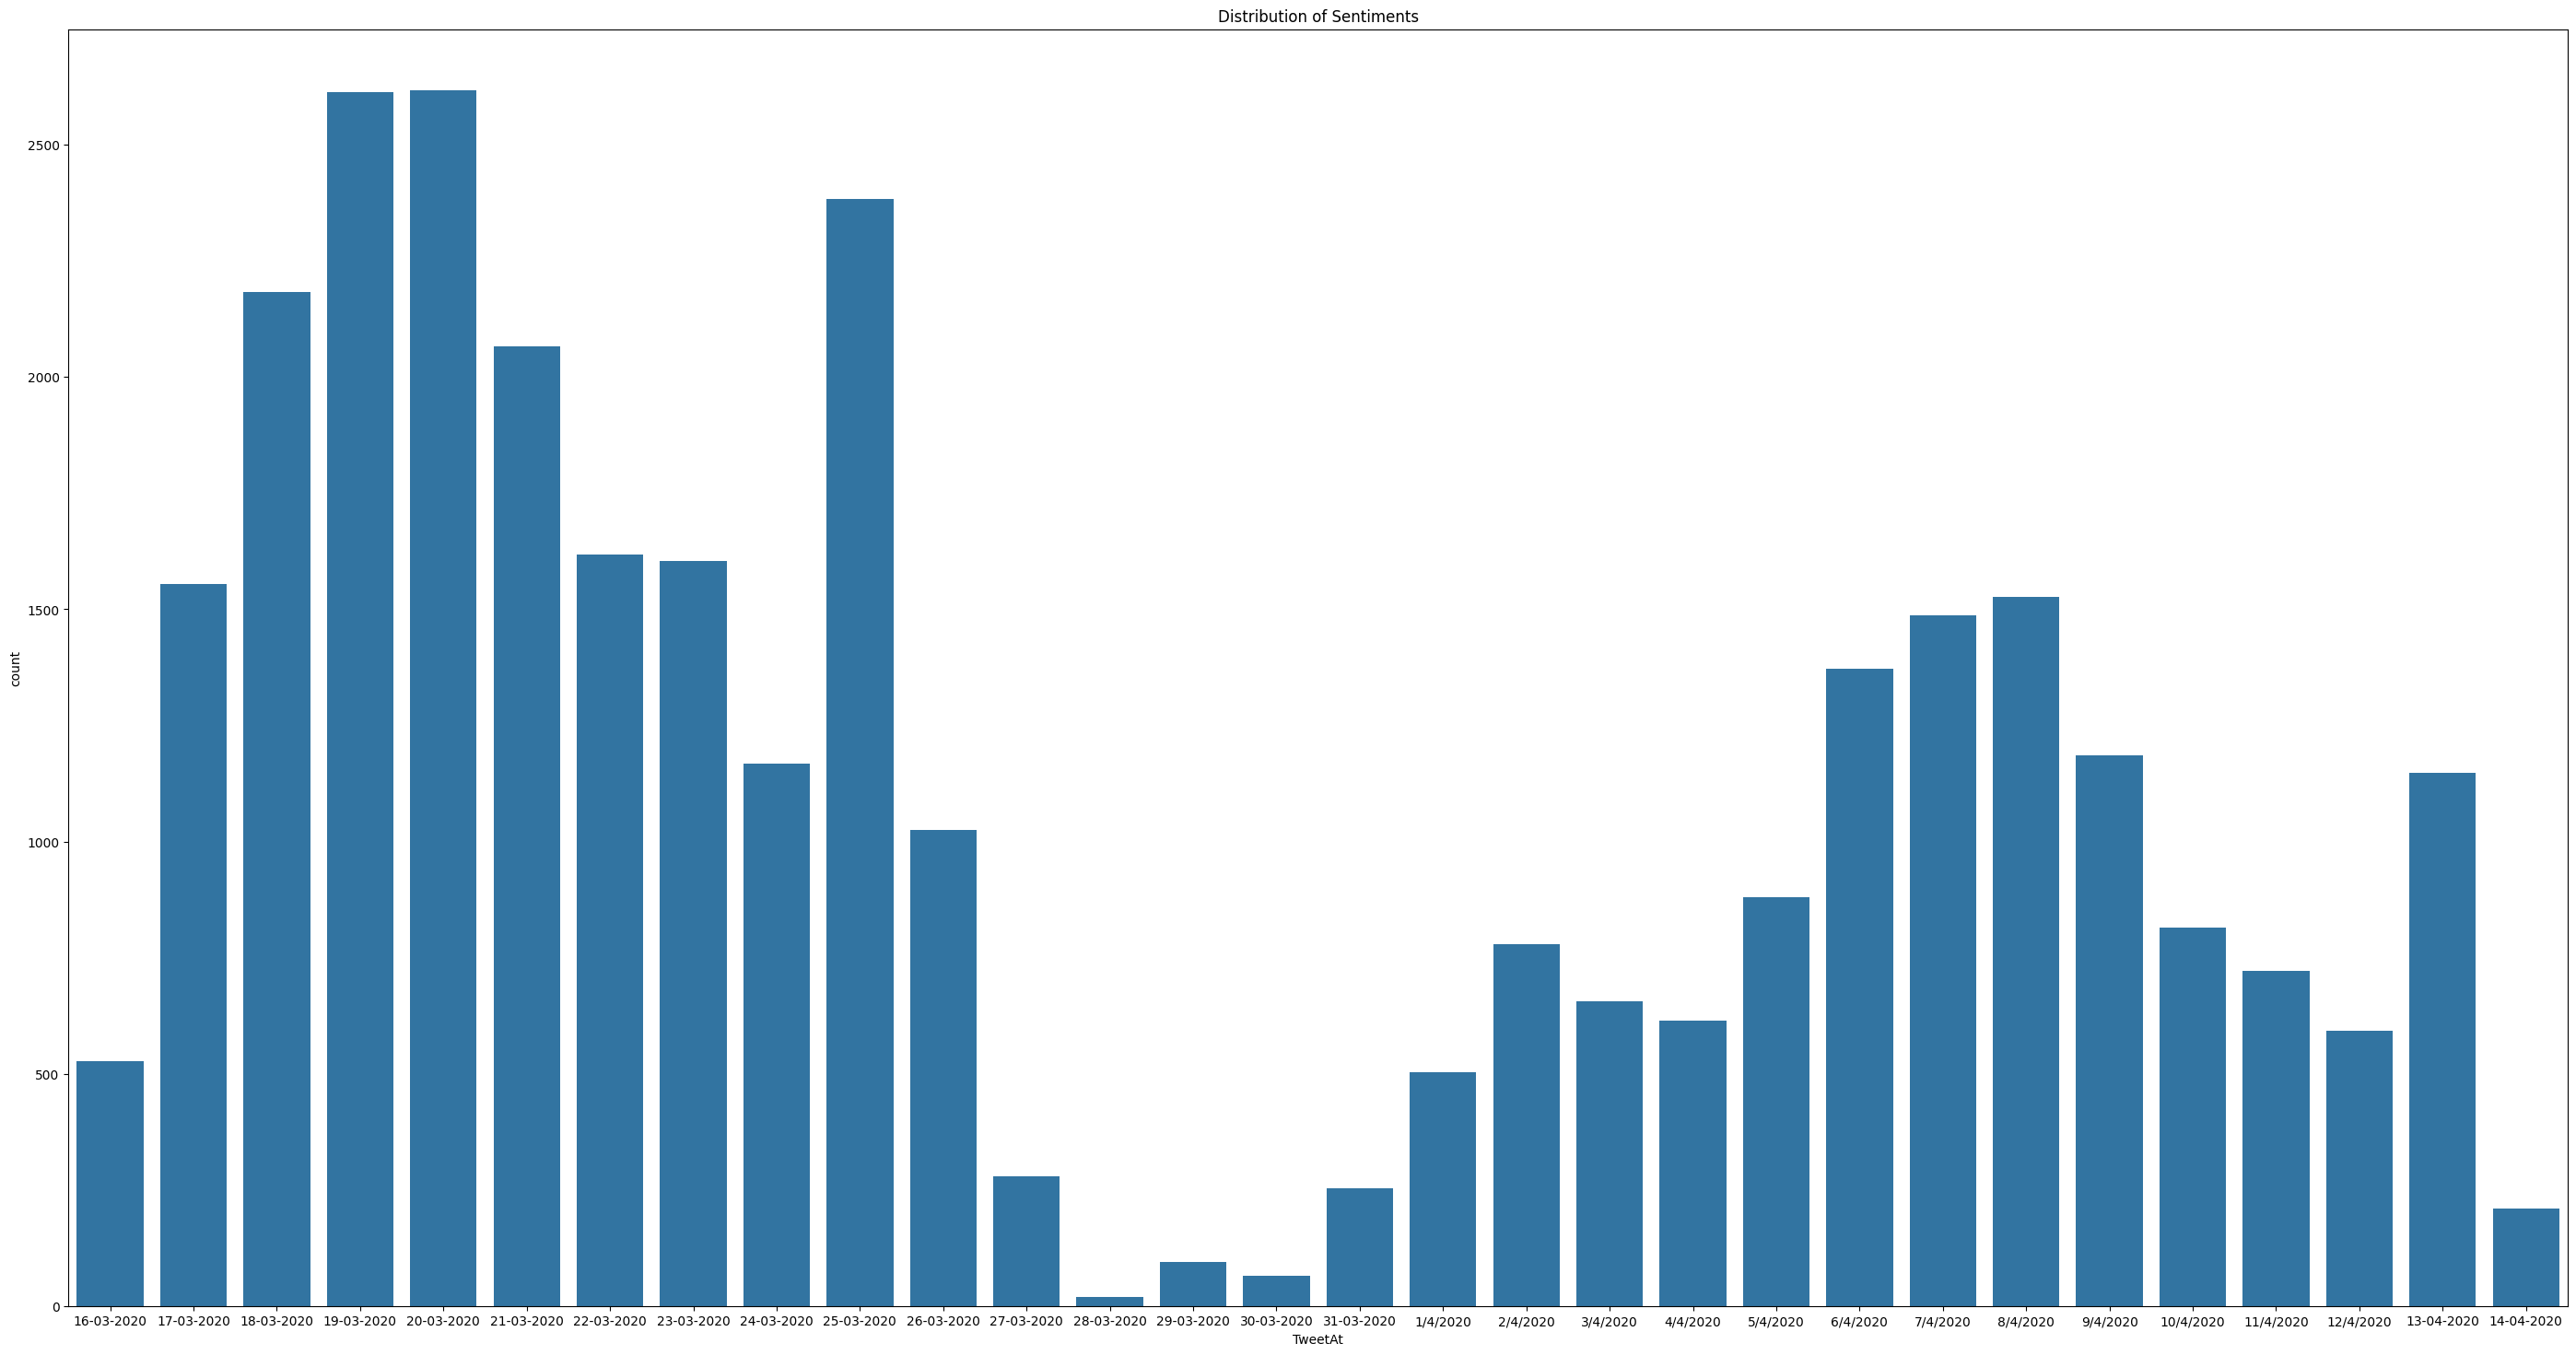

In [56]:
import matplotlib.pyplot as plt

# Ploting the distribution of sentiments
plt.figure(figsize=(35, 18))
sns.countplot(data=df_withoutnull, x='TweetAt')
plt.title('Distribution of Sentiments')
plt.show() # hence most of the tweets are on 19/3/2020

In [71]:
df_withoutnull['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)